In [1]:
import os

from IPython.display import display, HTML
# import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import ensemble as ensembles
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
features_dir = '../processed_features/'
# sample_file = 'twitter_patterns.csv'
sample_file = 'twitter_patterns_graph.csv'
data = pd.read_csv(os.path.join(features_dir, sample_file))
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 50, 'display.max_colwidth', -1):
    display(data)

,tp_group,tp_author,tp_tweet_len,tp_clean_tweet_len,tp_sentiment,tp_emojis_num,tp_mentions_num,tp_hashtags_num,tp_has_url,tp_has_image,tp_has_gif,tp_has_video,tp_has_place,tp_replies_count,tp_retweets_count,tp_likes_count,tp_is_retweet,tp_is_reply,tp_is_quote,tp_monthly,tn_degree_in,tn_degree_out,tn_degree_total,tn_pagerank,tn_betweenness,tn_closeness,tn_eigenvector,tn_authority,tn_hub,tn_lcc
0,musicians,seankingston,71.905769,34.223718,0.103461,0.092949,0.382692,0.167388,0.147276,0.003205,0.000080,0.002804,0.000000,13.726442,83.892788,31.451362,0.0,0.230929,0.002083,116.635514,6.0,8.0,14.0,0.001554,0.002930,0.243971,2.093441e-02,1.519769e-03,4.748792e-03,0.274725
1,athletes,blakegriffin23,61.189951,27.379085,0.089523,0.006944,0.723448,0.098448,0.068627,0.009395,0.000408,0.004902,0.000408,22.317402,267.846405,583.787173,0.0,0.558415,0.013480,21.857143,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,musicians,iamqueenlatifah,104.221778,35.273477,0.119092,0.122627,0.812438,0.737013,0.458541,0.343407,0.022977,0.054446,0.000000,30.388112,73.330669,247.492258,0.0,0.083417,0.015734,35.750000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,actors,diannaagron,100.513497,42.649370,0.127291,0.089682,0.794841,0.125375,0.194061,0.133773,0.000000,0.002400,0.000000,94.638572,417.284943,532.364127,0.0,0.111278,0.011398,30.587156,2.0,5.0,7.0,0.000553,0.000035,0.240199,1.364301e-03,2.371408e-04,1.301854e-02,0.285714
4,athletes,10ronaldinho,114.889362,41.120567,0.135525,0.595745,0.270922,0.479433,0.635461,0.479433,0.002837,0.036879,0.000000,34.361702,208.038298,588.409929,0.0,0.008511,0.024113,10.217391,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5,politicians,danarohrabacher,118.038284,71.020295,-0.023962,0.000308,0.839945,0.046049,0.025984,0.002229,0.000000,0.000384,0.000000,3.228014,2.200953,3.675200,0.0,0.856012,0.000769,111.179487,1.0,6.0,7.0,0.000364,0.000141,0.289421,2.887771e-03,2.640160e-03,2.704788e-02,0.761905
6,musicians,thalia,121.364014,41.818963,0.105697,1.377045,0.595786,1.125035,0.704186,0.127807,0.000277,0.022456,0.000000,42.111173,122.809537,207.591627,0.0,0.006931,0.009703,31.640351,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
7,politicians,reprichhudson,213.005970,97.456716,0.092603,0.253731,0.602239,0.704478,0.511940,0.328358,0.001493,0.007463,0.000000,5.282836,8.217164,25.154478,0.0,0.048507,0.144776,63.809524,5.0,11.0,16.0,0.001284,0.007651,0.293127,3.237497e-02,1.380085e-02,2.128867e-02,0.333333
8,actors,wilw,88.379461,41.844904,0.037754,0.004957,0.603795,0.122134,0.103919,0.064018,0.001100,0.001626,0.000000,25.516961,60.828485,200.350449,0.0,0.462128,0.016450,471.240876,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
9,musicians,tyga,69.592902,27.122331,0.030881,0.119735,0.413589,0.422245,0.269763,0.046163,0.000721,0.009665,0.000000,35.923687,367.263849,254.562752,0.0,0.061454,0.003318,58.745763,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [4]:
training_part = 0.8
estimators = 30

In [5]:
x = data.drop(['tp_author', 'tp_group'], axis=1).values
y = data['tp_group'].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-training_part)

In [7]:
# x = preprocessing.normalize(x)

In [8]:
model = ensembles.RandomForestClassifier(n_estimators=estimators)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_pred = model.predict(x_test)

In [10]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1:', metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7228915662650602
Precision: 0.7115196078431372
Recall: 0.7150621118012424
F1: 0.7039406856193331


In [11]:
def draw_confusion_matrix(true_values, pred_values, classes, normalize):
    plt.figure(figsize=(10, 5))
    cm = metrics.confusion_matrix(true_values, pred_values)
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        np.round(cm, 2)
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(cm, annot=True)

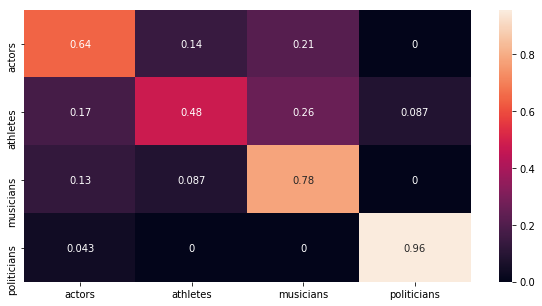

In [12]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=True)

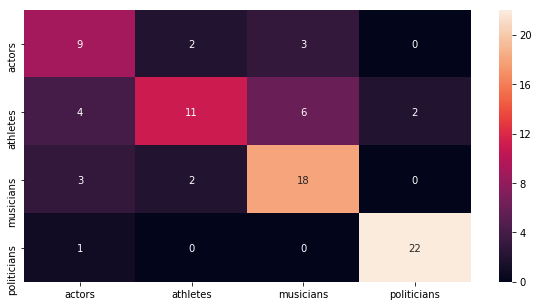

In [13]:
draw_confusion_matrix(y_test, y_pred, model.classes_, normalize=False)